In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [4]:
customer_transactions = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',  
    'Quantity': 'sum',    
    'ProductID': 'nunique'
}).reset_index()

In [5]:
customer_data = pd.merge(customers, customer_transactions, on='CustomerID', how='inner')

In [6]:
features = customer_data[['TotalValue', 'Quantity', 'ProductID']]

In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

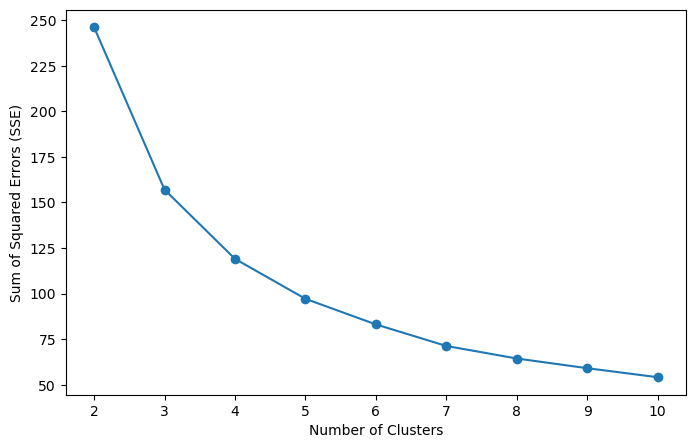

In [17]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [10]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

In [14]:
db_index = davies_bouldin_score(scaled_features, customer_data['Cluster'])
print(f"DB Index: {db_index:.4f}")

DB Index: 0.8753


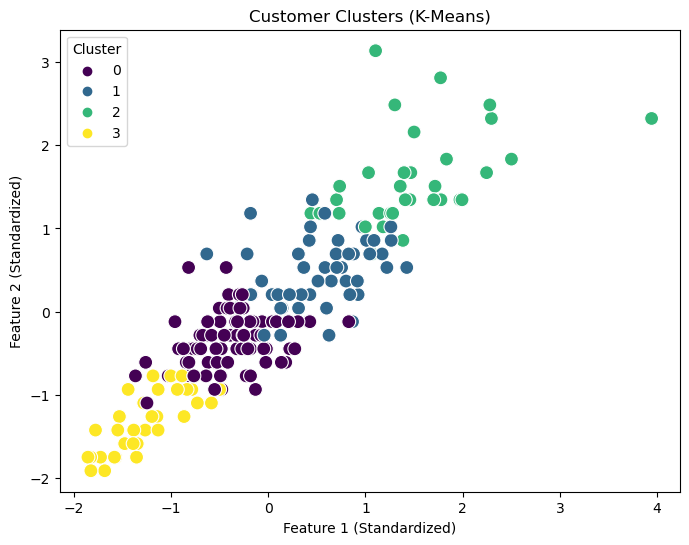

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=customer_data['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Customer Clusters (K-Means)')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend(title='Cluster')
plt.show()

In [18]:
customer_data.to_csv('Sneha_Gupta_Clustering.csv', index=False)
print("Clustering results'Sneha_Gupta_Clustering.csv'")

Clustering results'Sneha_Gupta_Clustering.csv'
